<a href="https://www.kaggle.com/code/theyazilimci/alzheimer-prediction-92-acc?scriptVersionId=93719241" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Alzheimer Prediction using Convolutional Neural Network 



<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
            color: white;
            border-radius: 10px;">
<font size="3">
    In this notebook we'll try to predict wheter or not a person have the alzheimer depending on the dataset.
We can see 4 folders that contains differents images with a total size of 44.1MB.<br> To classify those image we'll using tensorflow framework.<br> The dataset aren't split between training and testing set so we will do it because model can perform well with the training set however it can make bad prediction on something that it he never see before
 </font>

</div>
    
![image](https://c4.wallpaperflare.com/wallpaper/353/981/279/brain-splitting-selective-coloring-musical-notes-wallpaper-preview.jpg)

<font size=6> Data Importation 📖

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pathlib 
import random

In [2]:
path = '../input/alzheimer-mri-dataset/Dataset/'
data_dir = pathlib.Path(path)

<font size=6> Getting class names ♑︎

In [3]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
        'Very_Mild_Demented']], dtype='<U18')

<font size=6> Total number of images 💯

In [4]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

6400

<font size=6> Example Image 📈

In [5]:
def plot(path,class_name):
    print(path)
    plt.figure(figsize=(8,8))
    
    img = plt.imread(path)
    
    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: "+class_name)
    plt.imshow(img)

../input/alzheimer-mri-dataset/Dataset/Mild_Demented/mild_15.jpg


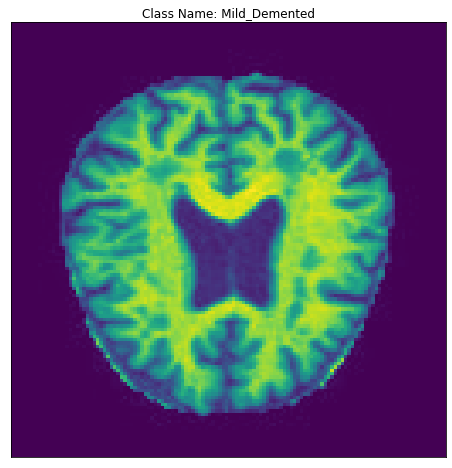

In [6]:
Mild_Demented = random.choice(list(data_dir.glob("Mild_Demented/*.jpg")))

plot(str(Mild_Demented),"Mild_Demented")

../input/alzheimer-mri-dataset/Dataset/Moderate_Demented/moderate_7.jpg


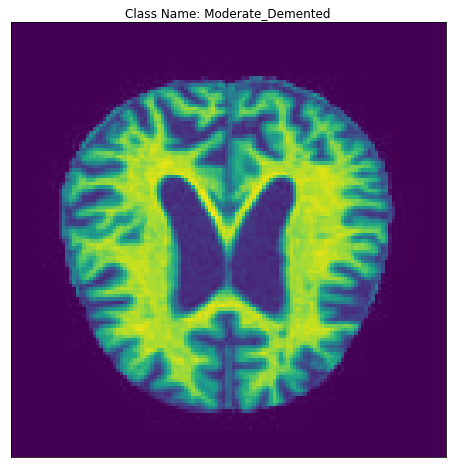

In [7]:
Moderate_Demented = random.choice(list(data_dir.glob("Moderate_Demented/*.jpg")))

plot(str(Moderate_Demented),"Moderate_Demented")

../input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1749.jpg


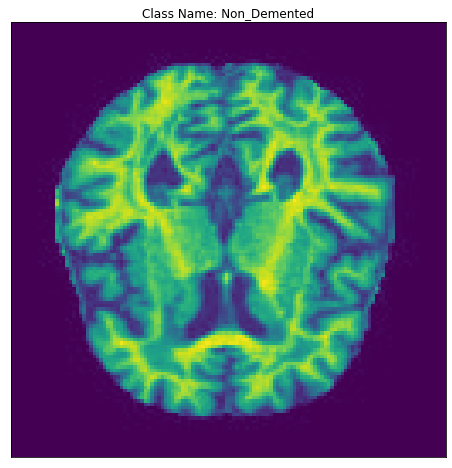

In [8]:
Non_Demented = random.choice(list(data_dir.glob("Non_Demented/*.jpg")))

plot(str(Non_Demented),"Non_Demented")

../input/alzheimer-mri-dataset/Dataset/Very_Mild_Demented/verymild_1246.jpg


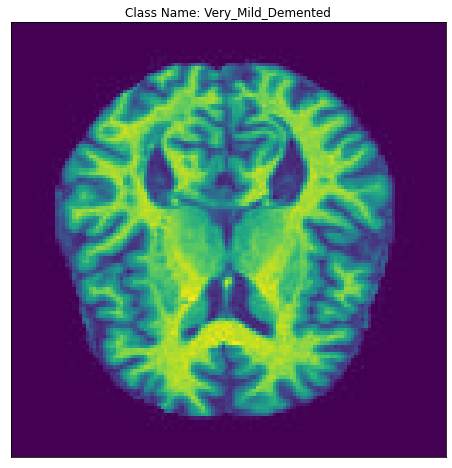

In [9]:
Very_Mild_Demented = random.choice(list(data_dir.glob("Very_Mild_Demented/*.jpg")))

plot(str(Very_Mild_Demented),"Very_Mild_Demented")

<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
            color: white;
            border-radius: 10px;">
<font size="4">
    We can see the difference between those classes even if some images have the same shame like a snack the model will perform well to predict the moderate demented because we can see very easily the difference between the moderate and the other one 
    </font>

</div>

<font size=6> Split the Dataset 🎬

In [10]:
batch_size = 32
img_height = 224
img_width = 224

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.


2022-04-22 12:47:54.673197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 12:47:54.781909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 12:47:54.782642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 12:47:54.785045: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


<font size=6> Build the model 🏗 
    
<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
            color: white;
            border-radius: 10px;">
<font size="3">
    <b>Explanation</b>: We rescale the images to fit between [0,1] then for each convolutional layer we can see that the size increase 16-32-64 the parameter 3 is the kernel size often it's 3 but we can see 5 too we specify the padding as same this mean when the convolution occurs we put all around the image 0 pixels because when you are making convolution the kernel have to be in the center of all the pixels that it see, if we do not add padding it cannot convolute the edges so we will loose some information,The max pooling have a size of 2 by 2 matrix it parse the images and get the maximum value between 4 pixel and so on....  at the end we add a dropout layer to avoid overfit this will off some neurons randomly then we add a flatten layer to put all this in one dimensional array, the activation is relu except for the last layer that have to return us a probability of belonging to each class so the last layer have to have as neurons the number of classes 
    </font>

</div>

In [12]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    
   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
    
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")
])

<font size=6> Compile the model 💿

Difference between Sparse and Categorical: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiw66__1af3AhVHTBoKHQCYB7MQFnoECAQQAQ&url=https%3A%2F%2Fdatascience.stackexchange.com%2Fquestions%2F41921%2Fsparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy&usg=AOvVaw0fPR_3m2cNqRyLbT4kwDw0

In [13]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

<font size=6> Fit the model 🏋🏼 
<b>92% Accuracy 

In [14]:
epochs = 5 
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/5


2022-04-22 12:47:59.108485: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-22 12:48:00.720100: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


160/160 [==============================] - 24s 103ms/step - loss: 1.0206 - accuracy: 0.5352 - val_loss: 0.8389 - val_accuracy: 0.6469
Epoch 2/5
160/160 [==============================] - 7s 41ms/step - loss: 0.7888 - accuracy: 0.6496 - val_loss: 0.6507 - val_accuracy: 0.7461
Epoch 3/5
160/160 [==============================] - 7s 42ms/step - loss: 0.5843 - accuracy: 0.7598 - val_loss: 0.4723 - val_accuracy: 0.8109
Epoch 4/5
160/160 [==============================] - 7s 43ms/step - loss: 0.4015 - accuracy: 0.8379 - val_loss: 0.3169 - val_accuracy: 0.8797
Epoch 5/5
160/160 [==============================] - 7s 44ms/step - loss: 0.2824 - accuracy: 0.8900 - val_loss: 0.1719 - val_accuracy: 0.9539


<font size=6> Plot the result 

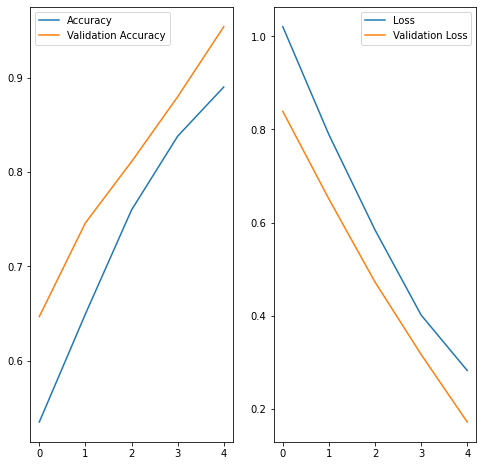

In [15]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

<font size=6> Predictions 🧙

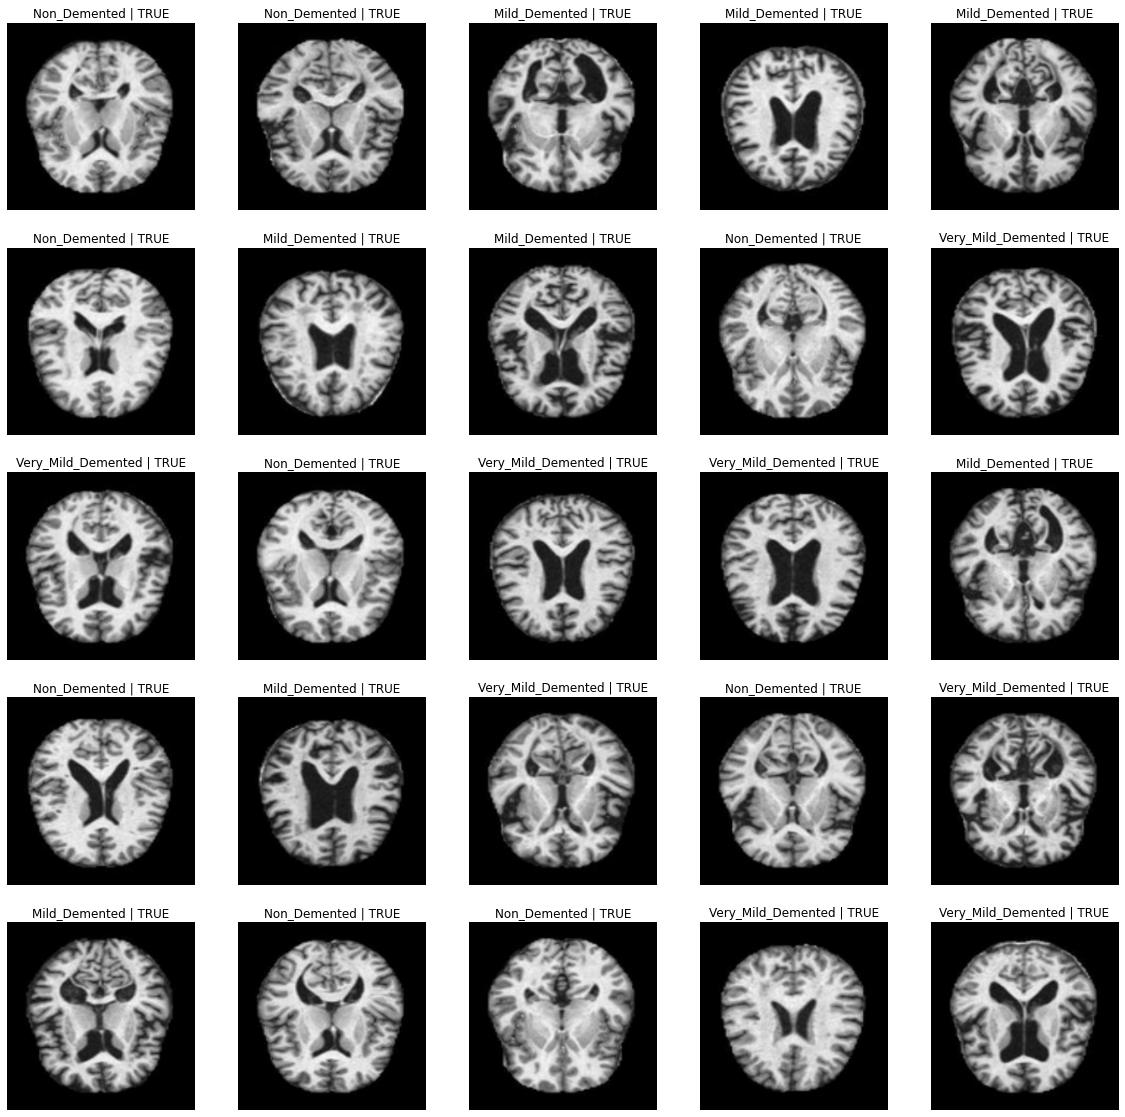

In [16]:
plt.figure(figsize=(20, 20))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")

![image](https://c4.wallpaperflare.com/wallpaper/353/981/279/brain-splitting-selective-coloring-musical-notes-wallpaper-preview.jpg)